In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

<font color = "DodgerBlue"><br>
Öncelikle veri setini inceleyelim. Sonrasında da bazı machine learning algoritmalarını uygulayalım.

In [2]:
data = pd.read_csv("column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Veri setinde null değer bulunmamaktadır.

In [7]:
data.shape

(310, 7)

In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
data["class"] = [1 if i == "Abnormal" else 0 for i in data["class"]]

Yukarıda korelasyon tablosunda class feature'sini göremeyiz çünkü bu feature string tipinde değerler tutmakta. Dolayısıyla burada string ifadeler yerine sayısal ifadeler yazdım. Artık Abnormal değeri yerine 1, Normal değeri yerine 0 bulunmaktadır. Böylece korelasyon tablosunda artık class feature'sini de görebiliriz.

In [10]:
data["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [11]:
data["class"].tail()

305    0
306    0
307    0
308    0
309    0
Name: class, dtype: int64

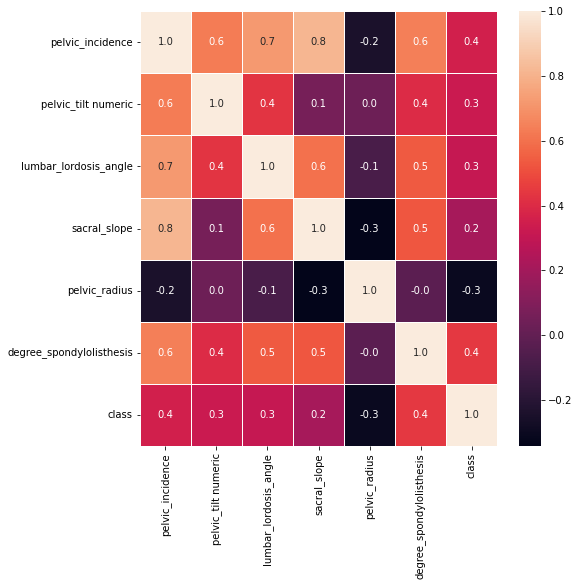

In [12]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5, fmt='.1f', ax=ax)
plt.show()

Çıktıda görüldüğü üzere sacral_slope ve pelvic_incidence feature'leri arasında 0.8 oranında ilişki vardır. Bu oran feature'ler arasındaki ilişkinin oldukça güçlü olduğunu gösteriyor.

y ekseni olarak sacral_slope feature'sini ve x ekseni olarak pelvic_incidence feature'sini seçelim ve machine learning algoritmalarını uygulayalım.

### LINEAR REGRESSION

In [13]:
x = data.pelvic_incidence.values.reshape(-1,1)
y = data.sacral_slope.values.reshape(-1,1)

In [14]:
x.shape

(310, 1)

In [15]:
from sklearn.linear_model import LinearRegression
import random

lr = LinearRegression()
lr.fit(x,y)

for i in range(310):
    test = np.arange(1,32.00,0.1).reshape(-1,1)

y_head = lr.predict(test)

In [16]:
test.shape

(310, 1)

In [17]:
test

array([[ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6.6],
       [ 6.7],
       [ 6.8],
       [ 6.9],
       [ 7. ],
       [ 7.1],
       [ 7.2],
       [ 7.3],
       [ 7.4],
       [ 7.5],
       [ 7

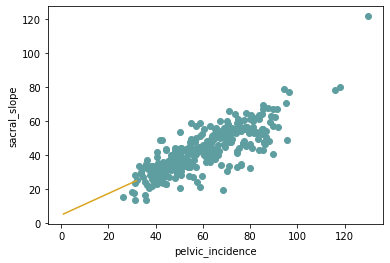

In [18]:
plt.scatter(x,y,color="CadetBlue")
plt.plot(test,y_head,color="GoldenRod")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

### Multiple Linear Regression

In [19]:
x = data.iloc[:,[0,2]].values
y = data.sacral_slope.values.reshape(-1,1)

In [20]:
multile_linear_regression = LinearRegression()
multile_linear_regression.fit(x,y)

y_head = multile_linear_regression.predict(x)

In [21]:
print("r_square score: ",r2_score(y,y_head))

r_square score:  0.6645537681897209


### Polynomial Linear Regression

In [22]:
x = data.pelvic_incidence.values.reshape(-1,1)
y = data.sacral_slope.values.reshape(-1,1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 8)

x_polynomial = polynomial_regression.fit_transform(x)

In [24]:
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

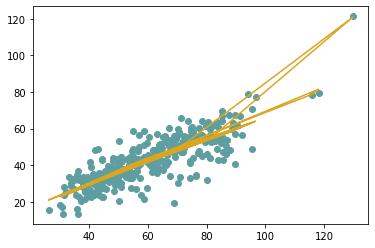

In [25]:
plt.scatter(x,y,color="CadetBlue")
y_head2 = linear_regression2.predict(x_polynomial)
plt.plot(x, y_head2, color="GoldenRod", label="poly")
plt.legend
plt.show()

In [26]:
print("r_square score: ",r2_score(y,y_head2))

r_square score:  0.690928145554417


### Decision Tree Regression

In [27]:
x = data.pelvic_incidence.values.reshape(-1,1)
y = data.sacral_slope.values.reshape(-1,1)

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(x,y)  #Ağaç modelini oluşturduk.

x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)  

y_head = tree_reg.predict(x_)

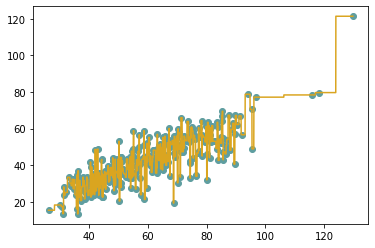

In [29]:
plt.scatter(x,y,color="CadetBlue")
plt.plot(x_,y_head,color="GoldenRod")
plt.show()

### Random Forest Regression

In [30]:
x = data.pelvic_incidence.values.reshape(-1,1)
y = data.sacral_slope.values.reshape(-1,1)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100 , random_state=42)
rf.fit(x,y)

C:\Users\raziy\AppData\Local\Temp/ipykernel_8096/2203463951.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor(random_state=42)

In [32]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

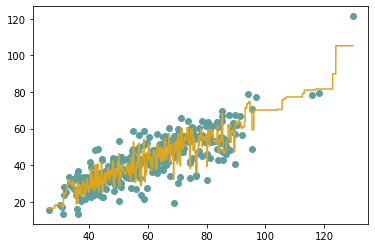

In [33]:
plt.scatter(x,y,color="CadetBlue")
plt.plot(x_,y_head,color="GoldenRod")
plt.show()